In [2]:
#import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image 
from keras.optimizers import Adam
import keras
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2 


In [ ]:
#img = image.load_img('./Images/test\\')

In [ ]:
plt.imshow(img)

In [ ]:
b_s = 8

Building a network model


In [2]:
cnn = Sequential()
#Adding 1st Convolution and Pooling Layer
cnn.add(Conv2D(32, 3 ,input_shape=(150,150,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 2nd Convolution and Pooling Layer
cnn.add(Conv2D(64, 3,activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 3rd Convolution and Pooling Layer
cnn.add(Conv2D(128, 3,activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.5))



#Flatten
cnn.add(Flatten())

#Adding Input and Output Layer
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dense(units=46,activation='softmax'))

#opt = tf.keras.optimizers.Adam(learning_rate=0.02)
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [3]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.5,
                                  zoom_range = 0.5,
                                  rotation_range=45,
                                  width_shift_range=.15,
                                  height_shift_range=.15,
                                  horizontal_flip = True)
#test_datagen = ImageDataGenerator(rescale = 1./255)



training_set = train_datagen.flow_from_directory('./Images/train',
                                                target_size = (150,150),
                                                batch_size = 32,
                                                shuffle=True,
                                                color_mode = "rgb", 
                                                class_mode = "categorical",
                                                )

testing_set = train_datagen.flow_from_directory('./Images/test',
                                              target_size = (150,150),
                                              batch_size = 32,
                                              shuffle=True,
                                              color_mode = "rgb", 
                                              class_mode = "categorical",
                                              )


 

Found 3539 images belonging to 46 classes.
Found 3539 images belonging to 46 classes.


Fit the Model

In [6]:

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


history = cnn.fit(training_set,
                  steps_per_epoch = 3539//32,
                  epochs = 30,
                  validation_data = testing_set,
                  validation_steps = 3539//32,
                  callbacks=callbacks_list
                 )





Epoch 1/30
110/110 [==============================] - 253s 2s/step - loss: 0.3501 - accuracy: 0.8865 - val_loss: 0.2700 - val_accuracy: 0.9080
Epoch 2/30
110/110 [==============================] - 218s 2s/step - loss: 0.3633 - accuracy: 0.8834 - val_loss: 0.2615 - val_accuracy: 0.9196
Epoch 3/30
110/110 [==============================] - 214s 2s/step - loss: 0.3414 - accuracy: 0.8896 - val_loss: 0.2574 - val_accuracy: 0.9224
Epoch 4/30
110/110 [==============================] - 203s 2s/step - loss: 0.3319 - accuracy: 0.8945 - val_loss: 0.2083 - val_accuracy: 0.9312
Epoch 5/30
110/110 [==============================] - 206s 2s/step - loss: 0.3628 - accuracy: 0.8802 - val_loss: 0.3144 - val_accuracy: 0.8980
Epoch 6/30
110/110 [==============================] - 257s 2s/step - loss: 0.3383 - accuracy: 0.8919 - val_loss: 0.1824 - val_accuracy: 0.9398
Epoch 7/30
110/110 [==============================] - 208s 2s/step - loss: 0.3977 - accuracy: 0.8714 - val_loss: 0.2863 - val_accuracy: 0.9077

KeyboardInterrupt: 

# Graphical Presentation



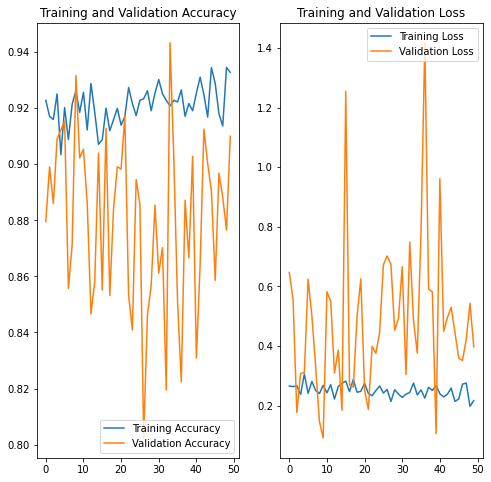

In [17]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
cnn.save('my_model1.h5') 

In [19]:
cnn.save_weights('my_model_weights1.h5')

# Let's test our Model

In [19]:
from keras.models import load_model
import numpy as np
import cv2
pretrained_model = load_model('my_model1.h5')
pretrained_model.load_weights('my_model_weights1.h5')

In [20]:
test_image = cv2.imread('./Images/test/Maruti Suzuki Baleno/1460.png')

test_image = cv2.resize(test_image,(150,150))

print(test_image.shape)

test_image = np.expand_dims(test_image, axis = 0 )
test_image = test_image*1./255.0

print(" after expand_dims: " +str(test_image.shape ))

result = pretrained_model.predict(test_image)

classes_predict = training_set.class_indices
print(classes_predict)


prediction_class =[]
for class_name,index in classes_predict.items():
    prediction_class.append(class_name)
print(result[0]) 

predicted_index = np.argmax(result[0])


print(prediction_class[predicted_index])



(150, 150, 3)
 after expand_dims: (1, 150, 150, 3)
{'Bajaj Pulsar NS200': 0, 'Hero Glamour': 1, 'Hero Passion Pro 110': 2, 'Hero Splendor': 3, 'Honda Activa 6G': 4, 'Honda City': 5, 'Honda Shine': 6, 'Hyundai Creta': 7, 'KTM 200 Duke': 8, 'KTM RC 200': 9, 'MG Hector': 10, 'Mahindra Centuro': 11, 'Mahindra Scorpio': 12, 'Mahindra XUV300': 13, 'Maruti Suzuki Baleno': 14, 'Maruti Suzuki Celerio': 15, 'Maruti Suzuki Ciaz': 16, 'Maruti Suzuki Ertiga': 17, 'Maruti Suzuki Swift': 18, 'Maruti Suzuki Vitara Brezza': 19, 'Maruti Suzuki Wagon R': 20, 'Renault Duster': 21, 'Renault Kwid': 22, 'Royal Enfield Classic 350': 23, 'Royal Enfield Continental GT 650': 24, 'Royal Enfield Himalayan': 25, 'Royal Enfield Interceptor 650': 26, 'Royal Enfield Thunderbird 350X': 27, 'Suzuki Access 125': 28, 'Suzuki Burgman Street 125': 29, 'Suzuki Gixxer': 30, 'Suzuki Gixxer SF': 31, 'Suzuki Intruder 150': 32, 'TVS Apache RR310': 33, 'TVS Apache RTR 160 4V': 34, 'TVS Apache RTR 200 4V': 35, 'TVS Jupiter': 36, 'T

# Generating Report on the testing data


In [27]:

#Re-initializing the test dataset generator with shuffle=False to create the confusion metrix
test_set = test_datagen.flow_from_directory('./Images/test',
                                              target_size = (150,150),
                                              batch_size = 8,
                                              shuffle=False,
                                              color_mode = "rgb", 
                                              class_mode = "categorical",
                                              )

filenames = test_set.filenames
nb_samples = len(filenames)
#print(nb_samples/51)

#predict the whole to get prediction
Y_predict = cnn.predict_generator(test_set,steps=None)

#Find the prediction classes with maximun probability
y_predict = np.argmax(Y_predict, axis = 1 )

#Utilities for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

#Printing confusion matrix based on actual data vs prediction data 
print(confusion_matrix(test_set.classes, y_predict))


#Printing the classification Report 
print(classification_report(test_set.classes, y_predict, target_names = prediction_class))


Found 3539 images belonging to 46 classes.
[[55  4  2 ...  0  0  0]
 [ 0 71  2 ...  2  0  0]
 [ 0  1 51 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  0  0]
 [ 0  0  0 ...  6 51  0]
 [ 0  0  0 ...  0  0 83]]
                                  precision    recall  f1-score   support

              Bajaj Pulsar NS200       0.98      0.82      0.89        67
                    Hero Glamour       0.87      0.87      0.87        82
            Hero Passion Pro 110       0.81      0.91      0.86        56
                   Hero Splendor       0.54      0.96      0.69        69
                 Honda Activa 6G       1.00      0.97      0.99        79
                      Honda City       0.97      1.00      0.98        88
                     Honda Shine       0.89      0.89      0.89        53
                   Hyundai Creta       0.99      0.97      0.98        99
                    KTM 200 Duke       0.97      1.00      0.98        60
                      KTM RC 200       0.93      1.00      0

In [ ]:

filenames = test_set.filenames
nb_samples = len(filenames)
print(nb_samples/51)


In [29]:
model_json = cnn.to_json()
with open("model_bw.json1", "w") as json_file:
    json_file.write(model_json)



In [3]:
img = cv2.imread('00451.jpg')

In [6]:
def extract_plate(img): # the function detects and perfors blurring on the number plate.
	plate_img = img.copy()
	
	#Loads the data required for detecting the license plates from cascade classifier.
	plate_cascade = cv2.CascadeClassifier('./indian_license_plate.xml')

	# detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
	plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.3, minNeighbors = 7)

	for (x,y,w,h) in plate_rect:
		a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1])) #parameter tuning
		plate = plate_img[y+a:y+h-a, x+b:x+w-b, :]
		# finally representing the detected contours by drawing rectangles around the edges.
		cv2.rectangle(plate_img, (x,y), (x+w, y+h), (51,51,255), 3)
        
	return plate_img, plate # returning the processed image